# Introduction to DBSCAN
Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). 

DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature. In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) 

# Introduction to K-Means

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.


# Imports 

In [2]:
import numpy as np #linear algebra 
import pandas as pd #creating and manipulating dataframes
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals

from sklearn.cluster import KMeans #K-Means
from sklearn.cluster import DBSCAN #DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score #silhouette Score and daives bouldin score

from sklearn.preprocessing import StandardScaler #scaler

In [4]:
#read the data
blobs = pd.read_csv('cluster_blobs.csv')
moons = pd.read_csv('cluster_moons.csv')
circles = pd.read_csv('cluster_circles.csv')

# Visaulize the 3 datasets 

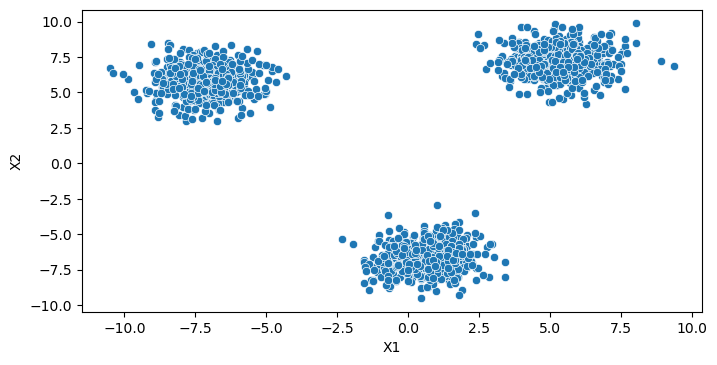

In [5]:
#scatter plot
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=blobs,x='X1',y='X2')
plt.show()

In [ ]:
#scatter plot
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=moons,x='X_1',y='X_2')
plt.show()

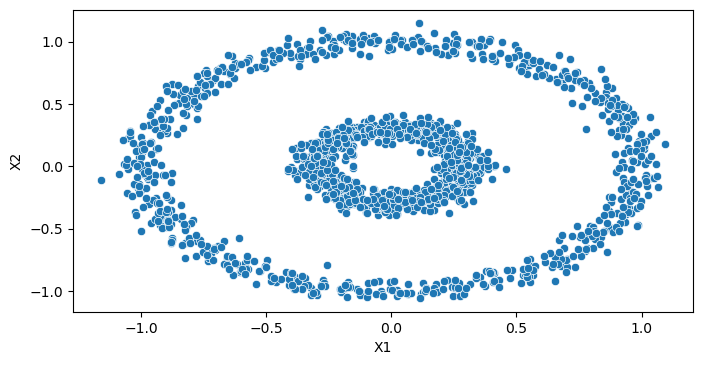

In [123]:
#scatter plot
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=circles,x='X1',y='X2')
plt.show()

# Label Discovery Function

In [8]:
#rename moons columns 
moons.rename({"X_1": 'X1', 'X_2': 'X2'}, axis = 1, inplace = True)

In [49]:
#define the function 
def display_categories(model,data):
    labels = model.fit_predict(data)
    plt.figure(figsize = (8,4), dpi = 100)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')
    plt.show()

# Kmeans Results

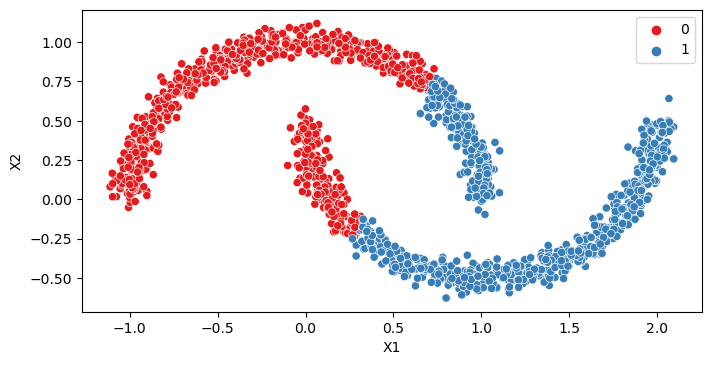

In [50]:
#intiate the model
model = KMeans(n_clusters = 2)
display_categories(model,moons)

# Silhouette Score For Moons Dataset

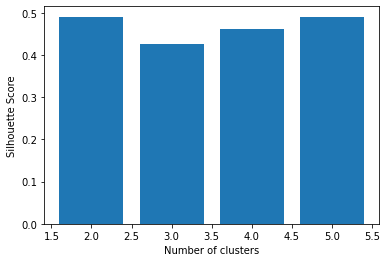

In [82]:
silhouette_scores = [] 

for n_cluster in range(2, 6):
    silhouette_scores.append( 
        silhouette_score(moons, KMeans(n_clusters = n_cluster).fit_predict(moons))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# Davies Bouldin Score For Moons Dataset

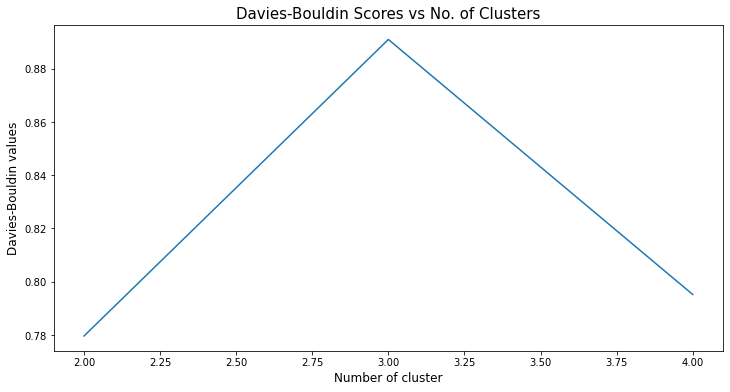

In [95]:
db = {}
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k).fit(moons)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
    db[k] = davies_bouldin_score(moons,clusters)

#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

#  Blobs Dataset

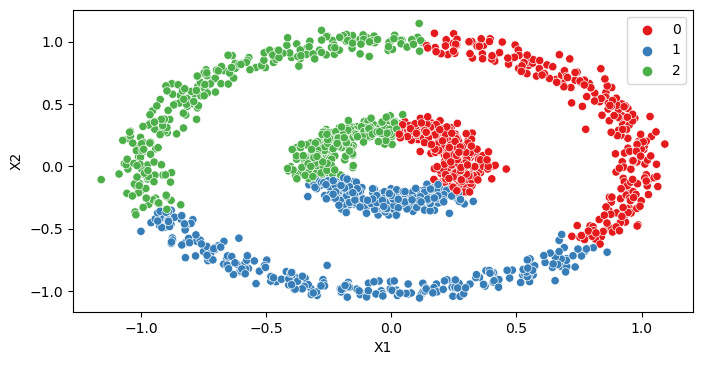

In [96]:
#intiate the model
model = KMeans(n_clusters = 3)
display_categories(model,blobs)

# Silhouette Score For Blobs Dataset

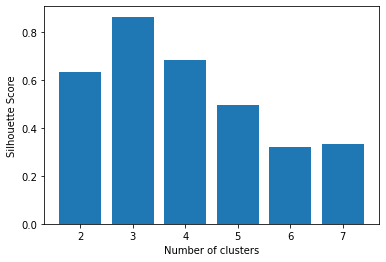

In [60]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(blobs, KMeans(n_clusters = n_cluster).fit_predict(blobs))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6 , 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# Davies Bouldin Score For Blobs Dataset

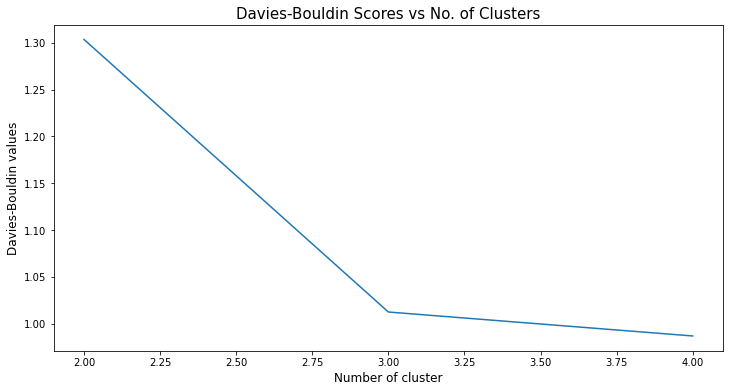

In [102]:
db = {}
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k).fit(blobs)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
    db[k] = davies_bouldin_score(blobs,clusters)

#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

# Circles Dataset

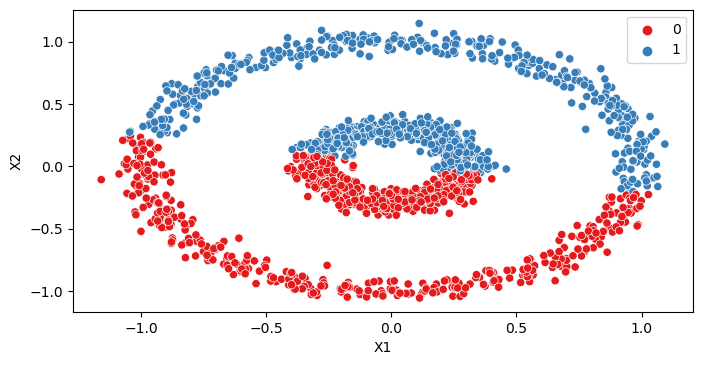

In [61]:
#intiate the model
model = KMeans(n_clusters = 2)
display_categories(model,circles)

# Silhouette Score For Circles Dataset

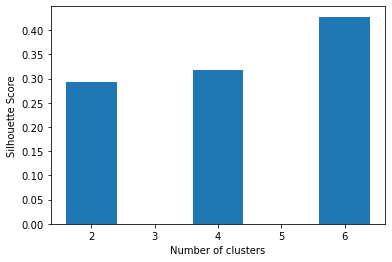

In [66]:
silhouette_scores = [] 

for n_cluster in range(2, 5):
    silhouette_scores.append( 
        silhouette_score(circles, KMeans(n_clusters = n_cluster).fit_predict(circles))) 
    
# Plotting a bar graph to compare the results 
k = [2, 4, 6] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# Davies Bouldin Score For Circles Dataset

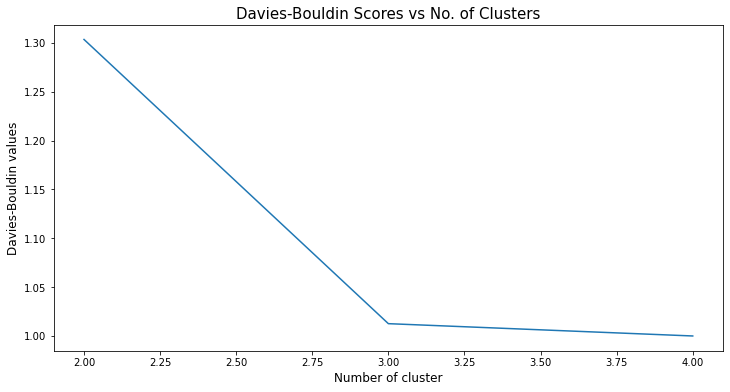

In [104]:
db = {}
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k).fit(circles)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
    db[k] = davies_bouldin_score(circles,clusters)

#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

> **Conclusion:** We clearly see that because K-Means is distance based algorithms, it is unable to capture complex relationships between features. 

# DBSCAN Results

# Blobs Dataset 

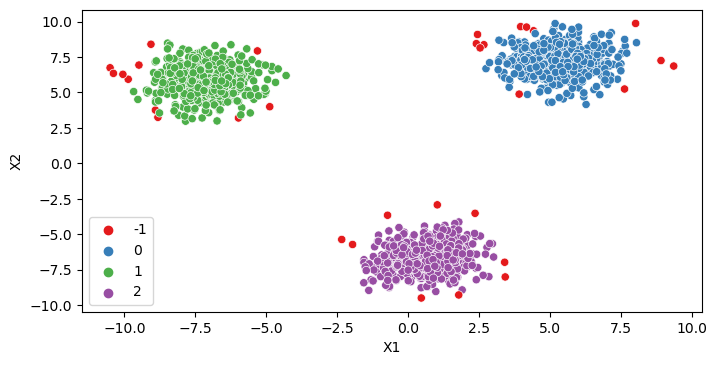

In [124]:
#intiate the model
model = DBSCAN(eps=0.6)
display_categories(model,blobs)

# Silhoutte and Davies Bouldin Score For Blobs Dataset

In [18]:
# dbscan clustering
from numpy import unique
from numpy import where
# define dataset
blobs = pd.read_csv('cluster_blobs.csv')
# define the model
model = DBSCAN(eps=0.6, min_samples= 3)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(blobs)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(blobs, yhat, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(blobs, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)


Silhouette Score: 0.5425
Davies Bouldin Score: 1.1160


# Moons Dataset 

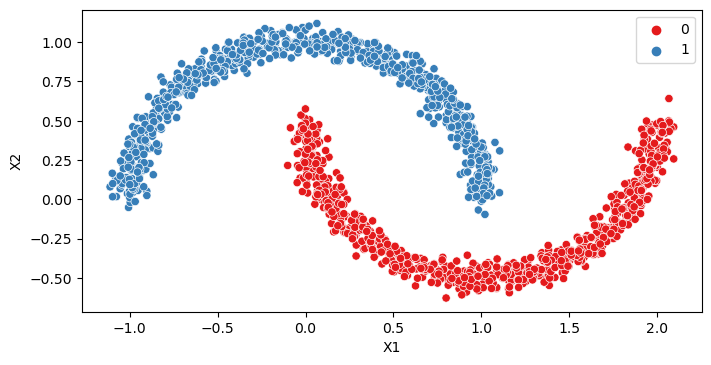

In [14]:
#intiate the model
model = DBSCAN(eps=0.15)
display_categories(model,moons)

# Silhoutte and Davies Bouldin Score For Moons Dataset

In [17]:
# dbscan clustering
from numpy import unique
from numpy import where
# define dataset
moons = pd.read_csv('cluster_moons.csv')
# define the model
model = DBSCAN(eps=0.15, min_samples= 2)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(moons)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(moons, yhat, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(moons, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)


Silhouette Score: 0.3334
Davies Bouldin Score: 1.1600


# Circles DataSet

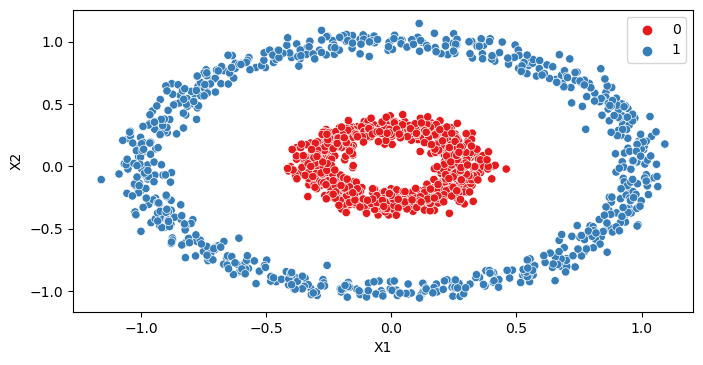

In [79]:
#intiate the model
model = DBSCAN(eps=0.15)
display_categories(model,circles)

# Silhoutte and Davies Bouldin Score For Circles Dataset

In [20]:
# dbscan clustering
from numpy import unique
from numpy import where
# define dataset
circles = pd.read_csv('cluster_circles.csv')
# define the model
model = DBSCAN(eps=0.15, min_samples= 3)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(circles)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(circles, yhat, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(circles, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)


Silhouette Score: 0.2083
Davies Bouldin Score: 1067.8808


As we can see the DBSCAN is much more accurate. It is able to capture complex relationships between features. Further more, the algorithms was able to spot outliers (Labeled as -1 in the blobs graph). 
However, one might think that these points are not outliers, here we should change the default parameters of DBSCAN to take that into account. The parameter that is responsible for that called "epsilon" which deside the range of which n pints is to be considered as neighbors.

# Hyperparameter tuning

In [16]:
# lets read another dataframe
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

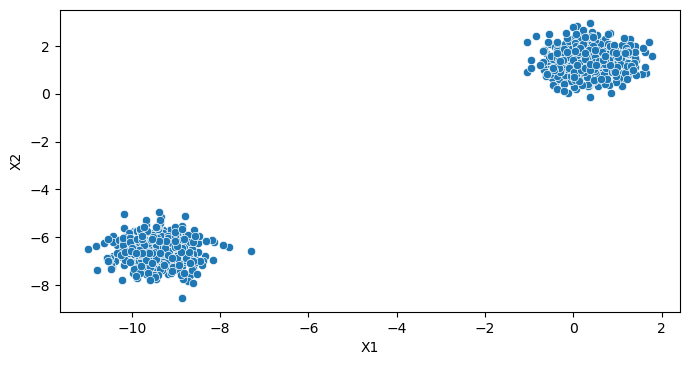

In [17]:
#scatter plot
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=two_blobs,x='X1',y='X2')
plt.show()

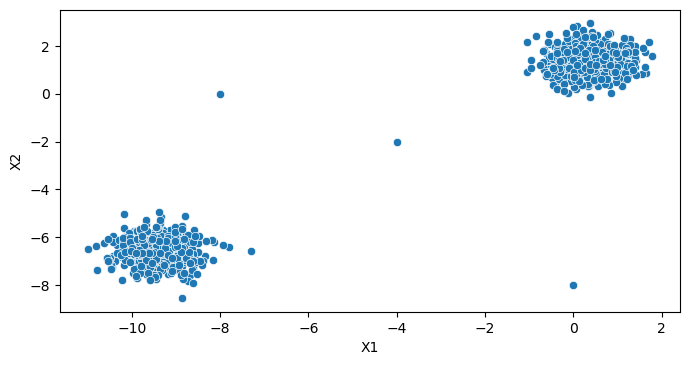

In [18]:
#scatter plot
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')
plt.show()

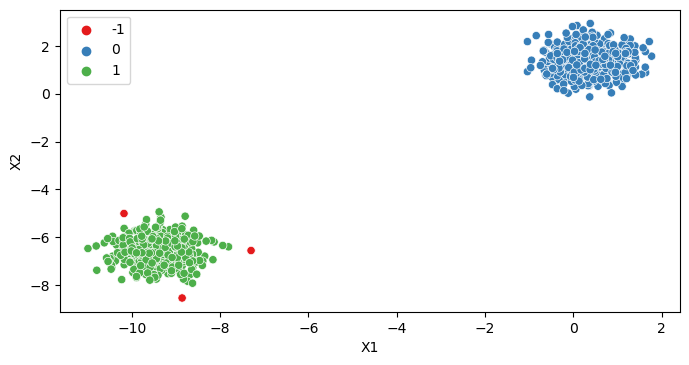

In [19]:
#the model
dbscan = DBSCAN()
display_categories(dbscan,two_blobs)

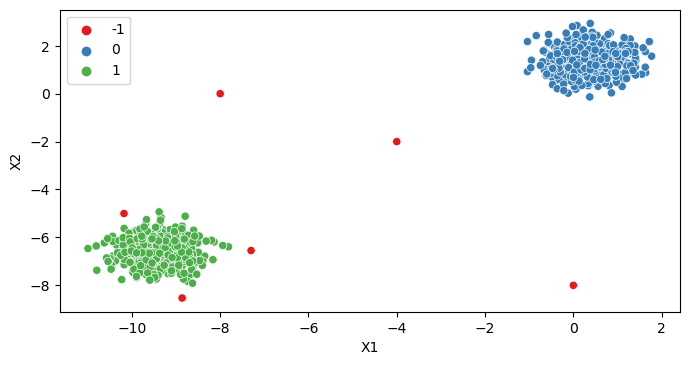

In [20]:
#the model
display_categories(dbscan,two_blobs_outliers)

> We need to adjust epsilon to make the algorithm understand that the 3 red dots near the green cluster are not actually outliers

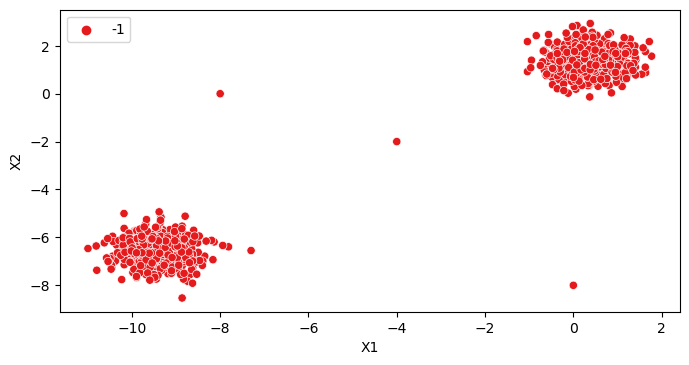

In [21]:
#understanding the effect of changing epsilon 
dbscan = DBSCAN(eps = 0.001) #the default 0.5 
display_categories(dbscan,two_blobs_outliers)

> Setting Epsilon to 0.001: Epsilon is the maximum distance between to samples for a one to be considered as the in the same neighborhood of the other. So, as Epsilon gets smaller there is a really tiny maximum distance which means pretty much every thing should be an outlier. No point is discovering any other point in the Epsioln distancw which means that every thing is outlier.


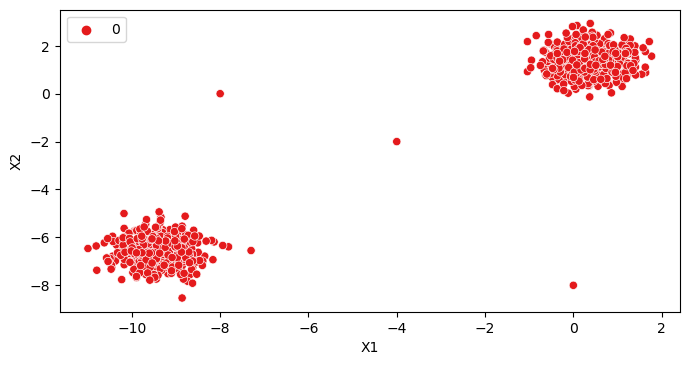

In [22]:
#understanding the effect of changing epsilon 
dbscan = DBSCAN(eps = 10) #the default 0.5 
display_categories(dbscan,two_blobs_outliers)

> Change Epsilon to 10: While the color is still the same, It is now considering every point as in the same cluster (0 not -1). The distance range is so large, so every point is fitting in the same cluster. 

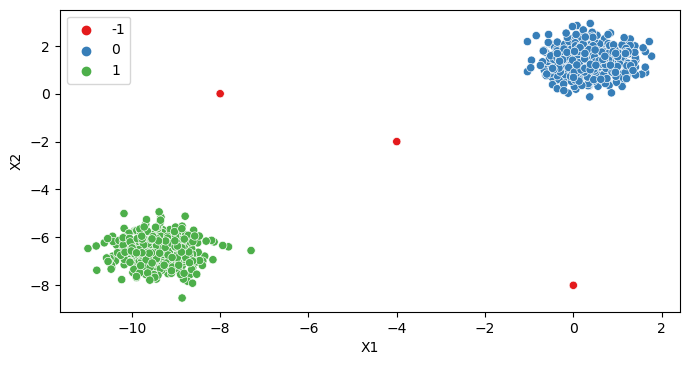

In [23]:
#understanding the effect of changing epsilon 
dbscan = DBSCAN(eps = 1) #the default 0.5 
display_categories(dbscan,two_blobs_outliers)

> Setting Epsilon = 1 gives us the desired outcome as shown in the above graph 

In [24]:
# the number of outliers
np.sum(dbscan.labels_ == -1)

3

In [25]:
# the percent of outliers
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

### But, how to automatically search for reasonable values for epsilon?

In [26]:
#Create an Elbo values 
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

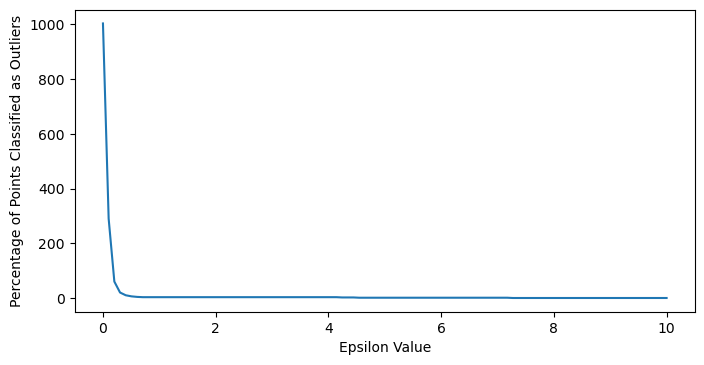

In [27]:
#create the Elbo Graph 
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

> We are interested in reflection points where we go from extreme number of outliers to some extreme number of no outliers

Text(0.5, 0, 'Epsilon Value')

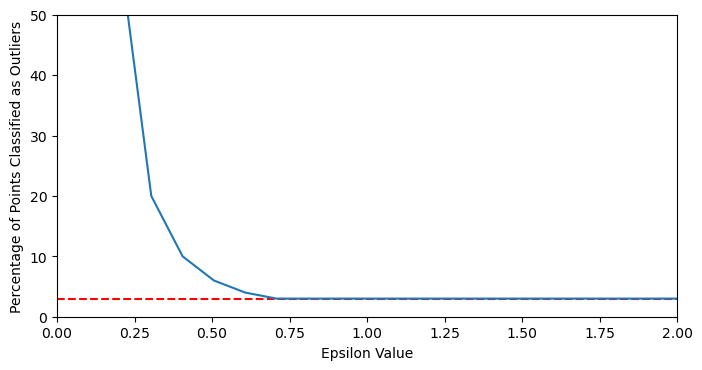

In [28]:
#create the Elbo Graph 
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)

#X, Y limits
plt.xlim(0,2)
plt.ylim(0,50)

#H-Line 
plt.hlines(y=3,xmin=0,xmax=2,colors='red',ls='--')

#labels 
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

> We know that we have 3 outliers in our dataset, so we set a h-line on 3 and we figured out the corresponding value of Epsilon that gives us this particular number of outliers is some where around 0.75 - In general we are searching for this turning point. May be for example you are interested for 1 percent of points as outliers, you can definitely play with that. 